In [1]:
#Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [2]:
dataset = pd.read_csv('/content/drive/My Drive/Deployment/iris.csv')

In [3]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
dataset['Species'].value_counts() #We have 150 samples for 3 categories (50 each category)

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [6]:
#Let's drop the feature 'Id'
dataset.drop('Id', axis=1, inplace=True)
dataset.head(2) #So now we have 5 important features

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [7]:
#Kita ganti juga kolom 'Species' menjadi data numerik
species_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica' : 2}
dataset['Species'] = dataset['Species'].map(species_mapping)
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


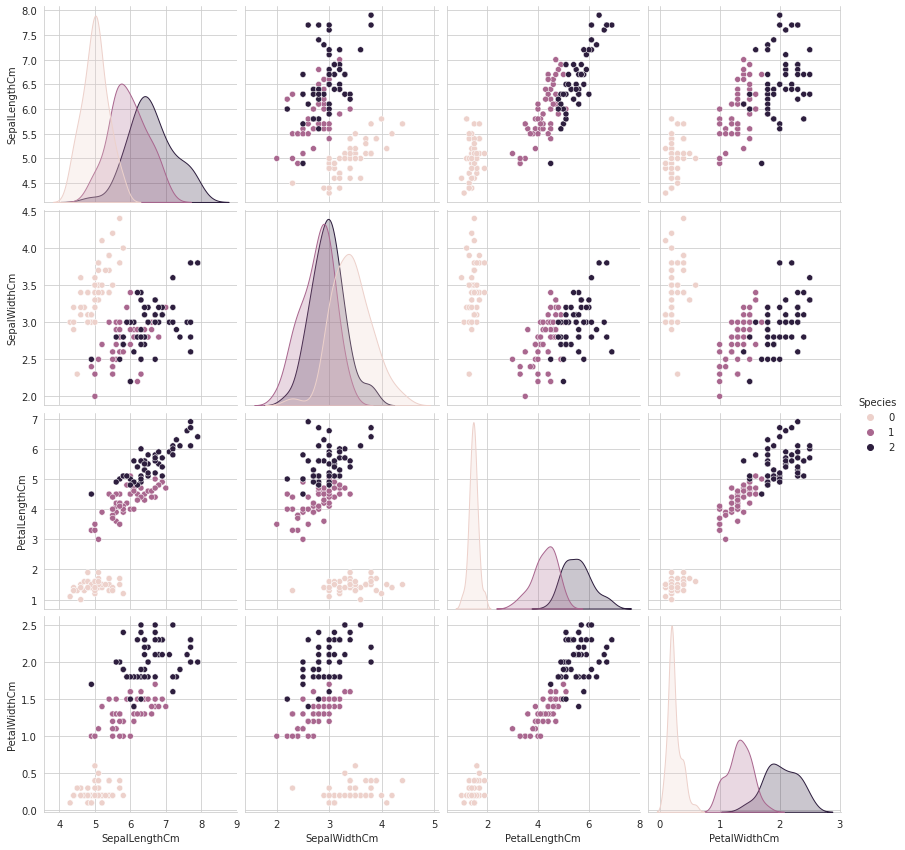

In [8]:
#Exploratory Data Analysis
sns.set_style("whitegrid");
sns.pairplot(dataset, hue="Species", size=3);
plt.show()

In [9]:
X = dataset.drop(['Species'], axis=1)
y = dataset['Species']

In [10]:
#train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

# Training

In [11]:
#Training using KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

ranfor = RandomForestClassifier(n_estimators = 50)
ranfor.fit(X_train, y_train)

y_pred = ranfor.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)*100
print('Model Accuracy: {} %'.format(accuracy))
print(f1_score(y_test, y_pred, average='macro'))
print(precision_score(y_test, y_pred, average='macro'))
print(recall_score(y_test, y_pred, average='macro'))

Model Accuracy: 96.66666666666667 %
0.9644444444444445
0.9583333333333334
0.9743589743589745


# Save Model Hasil Training

In [12]:
import pickle

In [13]:
filename = 'iris.pkl' # Nama yang digunakan bebas
pickle.dump(ranfor, open(filename, 'wb')) # Membuat file model, ganti logreg dengan nama model yang digunakan

# Loading Model Hasil Training

In [14]:
loaded_model = pickle.load(open(filename, 'rb'))

In [15]:
y_pred_loaded = loaded_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_loaded)*100

In [16]:
print('Model Accuracy: {} %'.format(accuracy))
print(f1_score(y_test, y_pred_loaded, average='macro'))
print(precision_score(y_test, y_pred_loaded, average='macro'))
print(recall_score(y_test, y_pred_loaded, average='macro'))

Model Accuracy: 96.66666666666667 %
0.9644444444444445
0.9583333333333334
0.9743589743589745


In [17]:
X_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
87,6.3,2.3,4.4,1.3
111,6.4,2.7,5.3,1.9
10,5.4,3.7,1.5,0.2
91,6.1,3.0,4.6,1.4
49,5.0,3.3,1.4,0.2
60,5.0,2.0,3.5,1.0
72,6.3,2.5,4.9,1.5
67,5.8,2.7,4.1,1.0
39,5.1,3.4,1.5,0.2
55,5.7,2.8,4.5,1.3


# Prediksi Data Tunggal

In [18]:
test_data = [[4.9, 3.0, 1.4, 0.2]]

prediction_example = loaded_model.predict(test_data)

prediction_example[0]

0

# Flask

In [19]:
!pip install flask-ngrok

In [20]:
from flask_ngrok import run_with_ngrok
from flask import Flask

In [21]:
app = Flask(__name__) # Membuat sebuah object Flask
model = pickle.load(open('iris.pkl','rb'))

@app.route("/home")
def home():
    return "<h1>Running Flask on Google Colab!</h1>"

In [22]:
from flask import jsonify, request

In [23]:
@app.route('/classify', methods=['POST'])
def classification():
  sepal_width = float(request.json['sepal_length'])
  sepal_length = float(request.json['sepal_width'])
  petal_length = float(request.json['petal_length'])
  petal_width = float(request.json['petal_width'])

  prediction = model.predict([[sepal_length, sepal_width, petal_length, petal_width]])[0]
  if prediction == 0:
      predicted_class = 'Iris-setosa'
  elif prediction == 1:
      predicted_class = 'Iris-versicolor'
  else:
      predicted_class = 'Iris-virginica'

  return jsonify({
      'Prediction': predicted_class
  })

In [24]:
run_with_ngrok(app)

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://bcc06a356a2e.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [06/Oct/2020 13:09:56] "POST /classify HTTP/1.1" 200 -
127.0.0.1 - - [06/Oct/2020 13:11:17] "POST /classify HTTP/1.1" 200 -
127.0.0.1 - - [06/Oct/2020 13:11:40] "POST /classify HTTP/1.1" 200 -
127.0.0.1 - - [06/Oct/2020 13:11:49] "POST /classify HTTP/1.1" 200 -
127.0.0.1 - - [06/Oct/2020 13:12:10] "POST /classify HTTP/1.1" 200 -
127.0.0.1 - - [06/Oct/2020 13:12:47] "POST /classify HTTP/1.1" 200 -
127.0.0.1 - - [06/Oct/2020 13:13:43] "POST /classify HTTP/1.1" 200 -
127.0.0.1 - - [06/Oct/2020 13:14:26] "POST /classify HTTP/1.1" 200 -
127.0.0.1 - - [06/Oct/2020 13:15:00] "POST /classify HTTP/1.1" 200 -


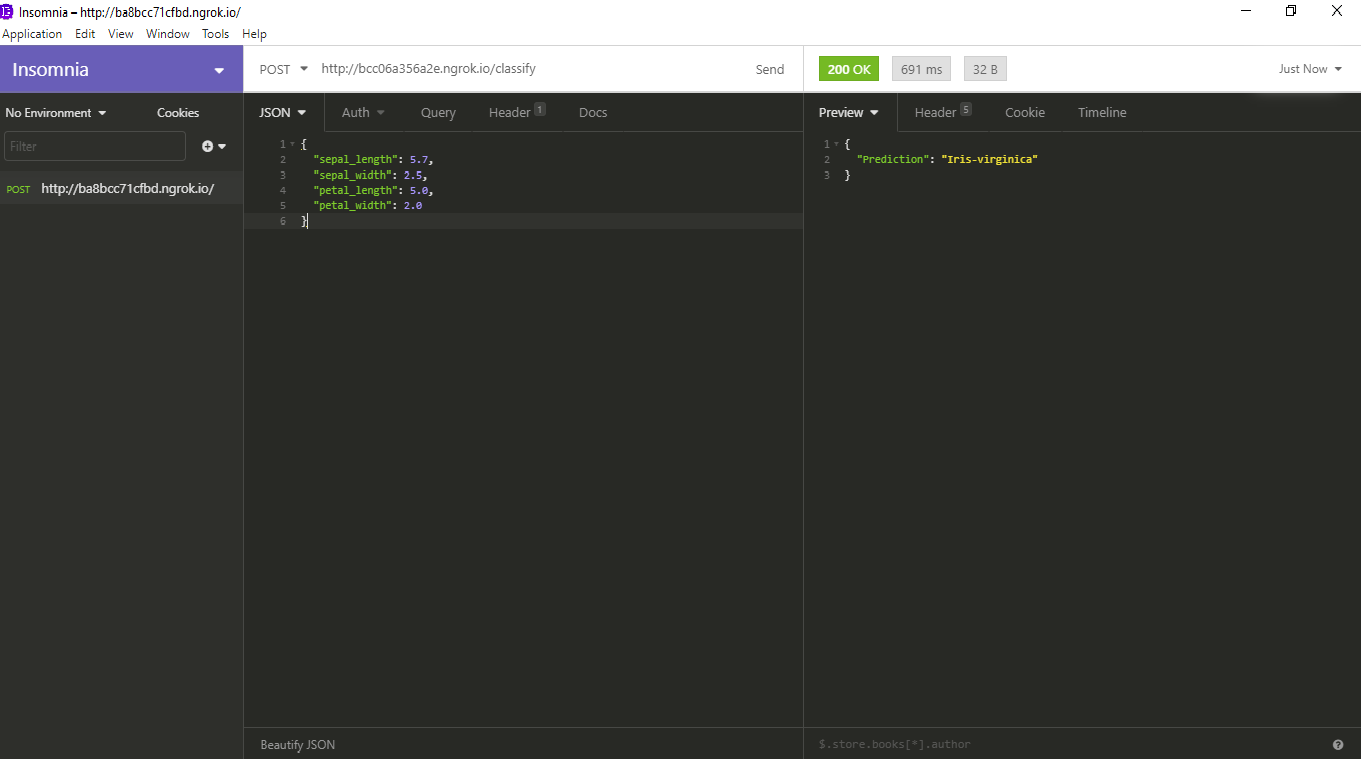